In [3]:
# EDA and cleaning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Suicide_overview_1985_to_2016.csv")

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
# 70% of HDI (Human Development Index) is missing (null). Though the index seems interesting for further analysis. 
# We need to determine how to handle the missing values.

# some columns are sourced from the others.we should consider this when building our models
# columns 'country', 'year' = column 'country-year'
# categorical column 'age' = categorical column 'generation' 

In [7]:
df.isnull().sum() # checking number of null's for HDI

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [8]:
df.shape

(27820, 12)

In [9]:
#getting main statistcs for our dataset
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [11]:
# suicides/100k pop maximum of 224.97 seems a little bit high and suspishious. To be checked.
# gdp_per_capita ranged from 251 to 162352. Probably to be normilized.

In [12]:
#checking duplicated rows
duplicated_rows = df[df.duplicated()]
if len(duplicated_rows)==0:
    print("There are no duplicated rows in the dataset")
else:
    print(f"There are {len(duplicated_rows)} duplicated rows in the dataset")

There are no duplicated rows in the dataset


In [13]:
# checking number of missing years in rows per country


In [14]:
# sliced dataframe with dropped duplicates. To have country-year dataset without duplicates.
df_country_year=df[['country', 'year']].drop_duplicates()
df_country_year.head()

,country,year
0,Albania,1987
12,Albania,1988
24,Albania,1989
36,Albania,1992
48,Albania,1993


In [15]:
# checking if pivot table can give interesting view of missing data
# checking how many missing years we have per country

pivot_table = df_country_year.pivot_table(index='country', columns='year', aggfunc='size', fill_value=0)
pivot_table=pivot_table.reset_index()
pivot_table.head()

year,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,0,0,1,1,1,0,0,1,1,...,1,1,1,1,0,0,0,0,0,0
1,Antigua and Barbuda,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,1,0
2,Argentina,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,Armenia,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Aruba,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,0


In [16]:
# creating new column with number of missing years
pivot_table['no_missing_years'] = (pivot_table.eq(0)).sum(axis=1)
pivot_table=pivot_table[pivot_table['no_missing_years']==1]


In [17]:
# new dataframe with countries without lag in years (the last year to be excluded from df)
countries_no_missing_year=pivot_table[['country','no_missing_years']]

#dropping 2016 as more than half of the countries don't have records for that year
try:
    df = df[df['year'] != 2016]
except:
    pass


In [18]:
countries_no_missing_year

year,country,no_missing_years
2,Argentina,1
12,Belgium,1
15,Brazil,1
19,Chile,1
20,Colombia,1
28,Ecuador,1
36,Greece,1
43,Israel,1
44,Italy,1
46,Japan,1


## Data Visualization

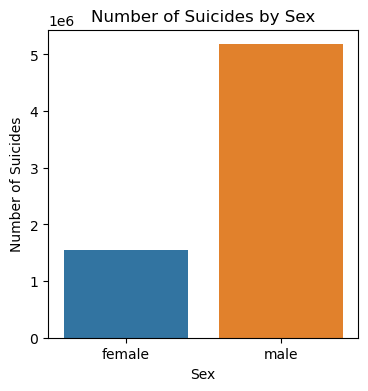

In [19]:
# Group the data by 'sex' and sum the number of suicides for each sex
suicides_per_sex = df.groupby('sex')['suicides_no'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(4, 4))  # Set the figure size
sns.barplot(x='sex', y='suicides_no', data=suicides_per_sex)

# Add labels and a title
plt.xlabel('Sex')
plt.ylabel('Number of Suicides')
plt.title('Number of Suicides by Sex')

# Show the plot
plt.show()

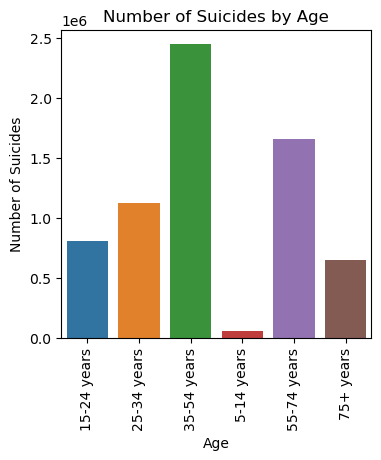

In [20]:
# Group the data by 'age' categorical column and sum the number of suicides for each category
suicides_per_age = df.groupby('age')['suicides_no'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(4, 4))  # Set the figure size
sns.barplot(x='age', y='suicides_no', data=suicides_per_age)

# Add labels and a title
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Number of Suicides')
plt.title('Number of Suicides by Age')

# Show the plot
plt.show()

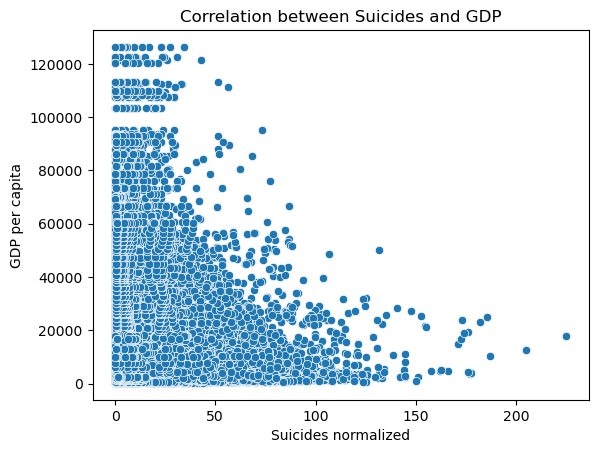

In [21]:
sns.scatterplot(x='suicides/100k pop', y='gdp_per_capita ($)', data=df)

# Add labels and a title
plt.xlabel('Suicides normalized')
plt.ylabel('GDP per capita')
plt.title('Correlation between Suicides and GDP')

# Show the plot
plt.show()

In [22]:
# not sure if that's a correct plot. but it shows more suicudes for countrues with less gpd

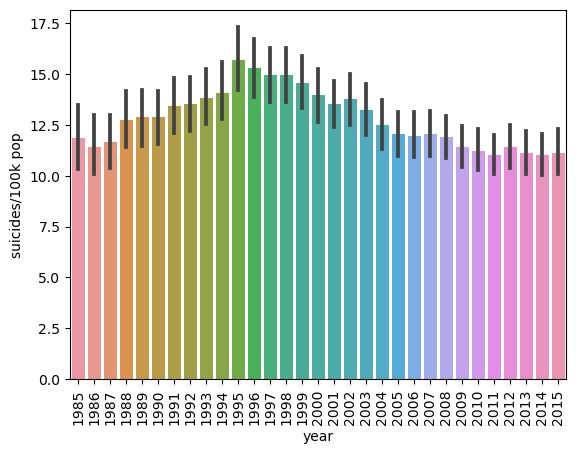

In [23]:
# let's try to plot number of suicides per year
sns.barplot(x='year',y='suicides/100k pop',data=df)
plt.xticks(rotation=90)
plt.show()

In [24]:
# number of suicudes per 100k people rised and down  1990s. 
#It stable from the 2008 keeping approximately the same level as it was on 1985

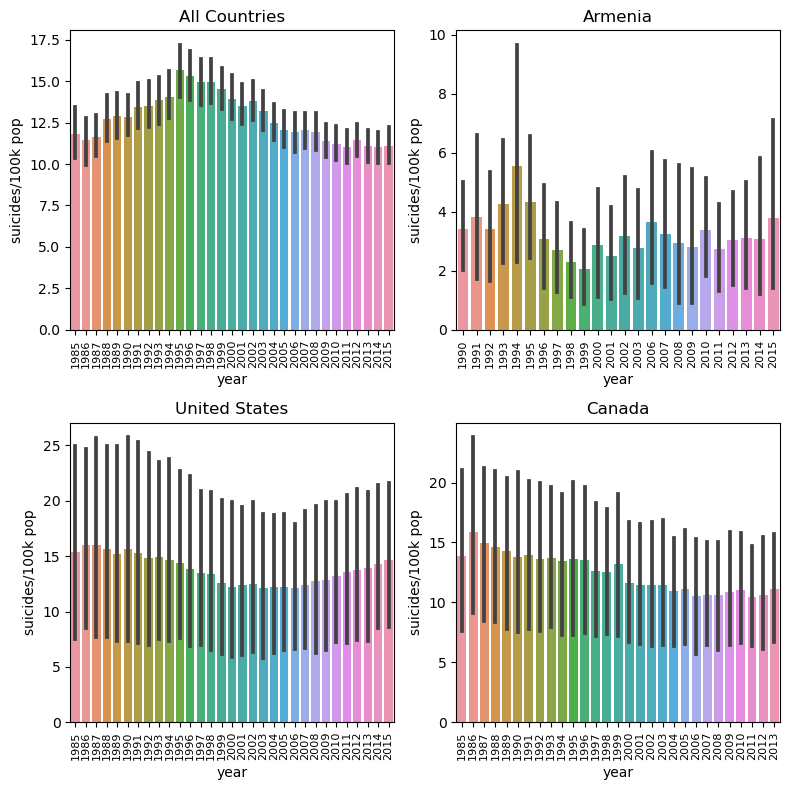

In [25]:
# let'look at suicides trend over the years per some countries
# Create a figure and two subplots (axes)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))

# Plot the bar plots per subplots (ax1,ax2,ax3,ax4)
sns.barplot(x='year', y='suicides/100k pop', data=df, ax=ax1)
sns.barplot(x='year', y='suicides/100k pop', data=df[df['country']=='Armenia'], ax=ax2)
sns.barplot(x='year', y='suicides/100k pop', data=df[df['country']=='United States'], ax=ax3)
sns.barplot(x='year', y='suicides/100k pop', data=df[df['country']=='Canada'], ax=ax4)


# Rotate x-axis labels for both subplots
ax1.tick_params(axis='x', rotation=90,labelsize=8)
ax2.tick_params(axis='x', rotation=90,labelsize=8)
ax3.tick_params(axis='x', rotation=90,labelsize=8)
ax4.tick_params(axis='x', rotation=90,labelsize=8)

# Set titles for both subplots
ax1.set_title('All Countries')
ax2.set_title('Armenia')
ax3.set_title('United States')
ax4.set_title('Canada')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with both subplots
plt.show()

In [26]:
# Consistant declining for suicide rate in Canada

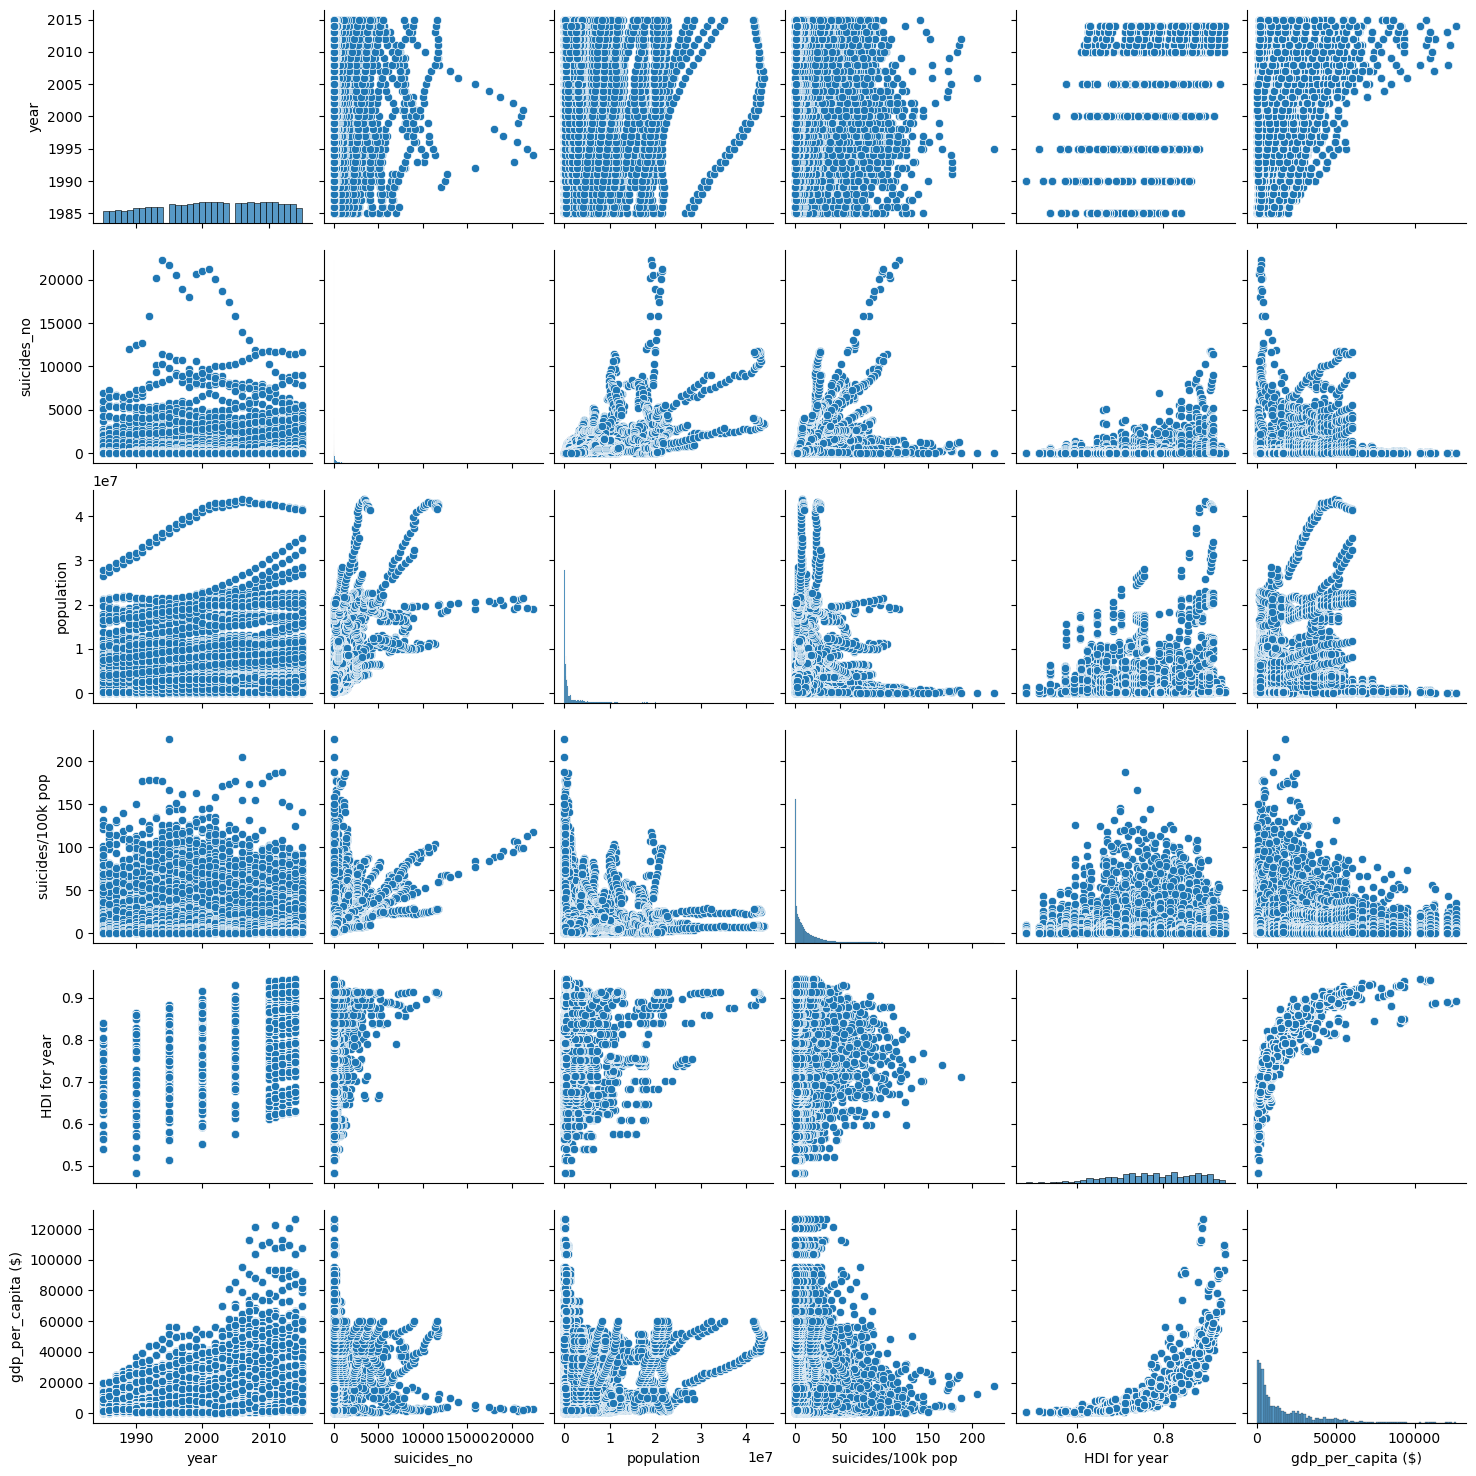

In [27]:
sns.pairplot(df)
plt.show()

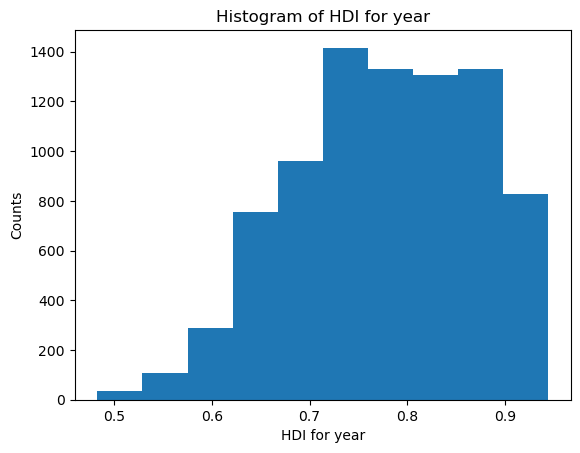

In [28]:
import matplotlib.pyplot as plt

# Create Figure and Axes objects with which to do your plotting
fig, ax = plt.subplots()

# Plot the data using one of Matplotlib's plotting functions
ax.hist(df['HDI for year'])

# Customize other aspects of the plot
ax.set_title('Histogram of HDI for year')
ax.set_xlabel('HDI for year')
ax.set_ylabel('Counts')

# Display the plot
plt.show()

In [29]:
# want to pivot  multiple rows for age (or generation) and sex into multiple columns with suicides/100k pop values (before wanted to have 1 and 0 values but realised that still have multiple lines per year and country). 
# Then we will have only one year per country, which will help us to create our model as well as to manage missing HDI indexes.
# age consist of the following categories: [75+ years,55-74 years,35-54 years,25-34 years,15-24 years,5-14 years]
# sex cosists: [male,female]

# also will drop:
# - 'gdp_for_year ($)' as it's directly correlated with 'gdp_per_capita' 
# - 'generation' as it's duplicated by meaning 'age'
# - 'country-year' as it's cobined from separate columns 'country' and 'year' that we're going to use in the model
# - 'suicides_no' and 'population' as they are part of 'suicides/100k pop'

In [30]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Renaming some columns with ($) sign as can't call columns with that sign
df = df.rename(columns={'gdp_for_year ($)': 'gdp_for_year','gdp_per_capita ($)':'gdp_per_capita'})

# creating new dataframe where will drop above mentined columns and will pivot 'age' and 'sex' columns

df_pivot_drop2 = df.drop(['gdp_for_year','generation','country-year','suicides_no','population'], axis=1)

In [31]:
df_pivot_drop2.head()

,country,year,sex,age,suicides/100k pop,HDI for year,gdp_per_capita
0,Albania,1987,male,15-24 years,6.71,NaN,796
1,Albania,1987,male,35-54 years,5.19,NaN,796
2,Albania,1987,female,15-24 years,4.83,NaN,796
3,Albania,1987,male,75+ years,4.59,NaN,796
4,Albania,1987,male,25-34 years,3.28,NaN,796


In [72]:
# Create separate columns for age categories
age_categories = ['75+ years', '55-74 years', '35-54 years', '25-34 years', '15-24 years', '5-14 years']

for age_category in age_categories:
    df_pivot_drop2[age_category] = (df_pivot_drop2['age'] == age_category).astype(int)*df_pivot_drop2['suicides/100k pop']

# Create separate columns for sex categories
sex_categories = ['male', 'female']

for sex_category in sex_categories:
    df_pivot_drop2[sex_category] = (df_pivot_drop2['sex'] == sex_category).astype(int)* df_pivot_drop2['suicides/100k pop']

# Drop the original 'age' and 'sex' columns
df_pivot_drop2.drop(['age', 'sex'], axis=1, inplace=True)


In [73]:
df_pivot_drop2.head()

,country,year,suicides/100k pop,HDI for year,gdp_per_capita,75+ years,55-74 years,35-54 years,25-34 years,15-24 years,5-14 years,male,female
0,Albania,1987,6.71,NaN,796,0.00,0.0,0.00,0.00,6.71,0.0,6.71,0.00
1,Albania,1987,5.19,NaN,796,0.00,0.0,5.19,0.00,0.00,0.0,5.19,0.00
2,Albania,1987,4.83,NaN,796,0.00,0.0,0.00,0.00,4.83,0.0,0.00,4.83
3,Albania,1987,4.59,NaN,796,4.59,0.0,0.00,0.00,0.00,0.0,4.59,0.00
4,Albania,1987,3.28,NaN,796,0.00,0.0,0.00,3.28,0.00,0.0,3.28,0.00


In [74]:
# Group by 'country', 'year', and 'gdp_per_capita'
# Use 'sum()' for most columns and 'mean()' for 'HDI for year'
# For newly created columns it will be sums of zeros plus one value, so we'll get all in one rows.
# For 'suicides/100k pop' it will bring the total of the suicides , which will be correct, but we will drop it
# mean HDI for year will bring the same result as per each individual year, but I could't include it in grouping because of Null values

df_grouped_pivot2 = df_pivot_drop2.groupby(['country', 'year', 'gdp_per_capita']).agg({
    'suicides/100k pop': 'sum',
    '75+ years':'sum',
    '55-74 years': 'sum',
    '35-54 years': 'sum',
    '25-34 years': 'sum',
    '15-24 years': 'sum',
    '5-14 years': 'sum',
    'male': 'sum',
    'female':'sum', 
    'HDI for year': 'mean'       # Mean
}).reset_index()



In [75]:
df_grouped_pivot2.head()

,country,year,gdp_per_capita,suicides/100k pop,75+ years,55-74 years,35-54 years,25-34 years,15-24 years,5-14 years,male,female,HDI for year
0,Albania,1987,796,31.85,7.40,0.73,7.34,4.84,11.54,0.00,20.50,11.35,NaN
1,Albania,1988,769,32.46,9.97,4.88,5.87,3.70,8.04,0.00,18.91,13.55,NaN
2,Albania,1989,833,33.40,8.89,4.89,7.14,7.10,5.38,0.00,27.88,5.52,NaN
3,Albania,1992,251,18.00,0.00,3.74,4.11,4.35,5.80,0.00,12.88,5.12,NaN
4,Albania,1993,437,32.56,4.13,5.42,4.96,6.58,10.91,0.56,22.80,9.76,NaN


In [76]:
# now when we have a table cosisting of unique rows , let's try to fill out HDI NaN indexes imputing mean values per each country


In [77]:
# Calculate the mean 'HDI for year' per country
mean_hdi_by_country = df_grouped_pivot2.groupby('country')['HDI for year'].transform('mean')

# Fill NaN values in 'HDI for year' with the calculated means
df_grouped_pivot2['HDI for year'].fillna(mean_hdi_by_country)



0       0.673
1       0.673
2       0.673
3       0.673
4       0.673
        ...  
2300    0.655
2301    0.661
2302    0.668
2303    0.672
2304    0.675
Name: HDI for year, Length: 2305, dtype: float64

In [78]:
df_grouped_pivot2.head()

,country,year,gdp_per_capita,suicides/100k pop,75+ years,55-74 years,35-54 years,25-34 years,15-24 years,5-14 years,male,female,HDI for year
0,Albania,1987,796,31.85,7.40,0.73,7.34,4.84,11.54,0.00,20.50,11.35,NaN
1,Albania,1988,769,32.46,9.97,4.88,5.87,3.70,8.04,0.00,18.91,13.55,NaN
2,Albania,1989,833,33.40,8.89,4.89,7.14,7.10,5.38,0.00,27.88,5.52,NaN
3,Albania,1992,251,18.00,0.00,3.74,4.11,4.35,5.80,0.00,12.88,5.12,NaN
4,Albania,1993,437,32.56,4.13,5.42,4.96,6.58,10.91,0.56,22.80,9.76,NaN


In [79]:
# Let's create "Multivariate Linear Regression" with:
# dependant variable : "suicides/100k" 
# independent variables : "gdp_per_capita","75+ years","55-74 years","35-54 years","25-34 years","15-24 years","5-14 years","male","female","HDI for year"

In [85]:
# change dataframe from df_grouped_pivot2 to df_grouped_pivot3, as there were still some nulls in 'HDI for year' column. See below for details

import statsmodels.api as sm

y = df_grouped_pivot3['suicides/100k pop']
X = df_grouped_pivot3[["gdp_per_capita", "75+ years","55-74 years","35-54 years","25-34 years","15-24 years","5-14 years","male","female","HDI for year"]]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept
X.head()

,const,gdp_per_capita,75+ years,55-74 years,35-54 years,25-34 years,15-24 years,5-14 years,male,female,HDI for year
6,1.0,835,8.88,6.17,5.96,8.23,9.15,2.16,24.49,16.06,0.619
11,1.0,1299,9.31,5.64,2.58,8.55,4.35,0.27,20.41,10.29,0.656
16,1.0,2931,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.695
21,1.0,4359,7.04,11.17,8.42,8.28,5.86,0.89,26.18,15.48,0.722
45,1.0,13657,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.781


In [86]:
# Check for missing values in the DataFrame (was trying to model before and got an error)
missing_values = df_grouped_pivot2.isna().sum()
print(missing_values)

country                 0
year                    0
gdp_per_capita          0
suicides/100k pop       0
75+ years               0
55-74 years             0
35-54 years             0
25-34 years             0
15-24 years             0
5-14 years              0
male                    0
female                  0
HDI for year         1608
dtype: int64


In [87]:
# so there were some contries without any data in 'HDI for year' column that's why the mean didn't work
# let's remove those rows

df_grouped_pivot3 = df_grouped_pivot2.dropna(subset=['HDI for year'])

In [88]:
missing_values2 = df_grouped_pivot3.isna().sum()
print(missing_values2)

country              0
year                 0
gdp_per_capita       0
suicides/100k pop    0
75+ years            0
55-74 years          0
35-54 years          0
25-34 years          0
15-24 years          0
5-14 years           0
male                 0
female               0
HDI for year         0
dtype: int64


In [89]:
model = sm.OLS(y, X) #instantiate
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      suicides/100k pop   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.896e+29
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:37:21   Log-Likelihood:                 18069.
No. Observations:                 697   AIC:                        -3.612e+04
Df Residuals:                     687   BIC:                        -3.607e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.35e-13   6.57e-13      0.

# Let's check linear regression assumptions:
- Normality
- Linearity
- Independence
- Homoscedasticity
- Multicollinearity (for Multivariant Linear Regression)

In [91]:
# Residuals checking Normality
residuals = results.resid
residuals

6      -5.684342e-14
11     -3.907985e-14
16      2.594896e-14
21      9.237056e-14
45      5.101901e-13
            ...     
2300   -2.842171e-14
2301   -1.421085e-14
2302    0.000000e+00
2303    0.000000e+00
2304    1.421085e-14
Length: 697, dtype: float64

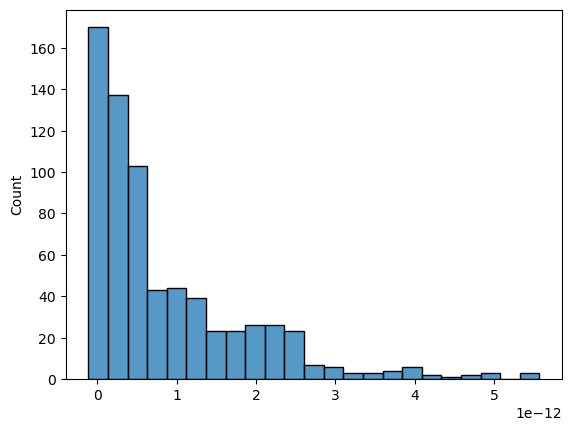

In [92]:
sns.histplot(residuals)
plt.show()

In [93]:
# residuals are not normaly distributed

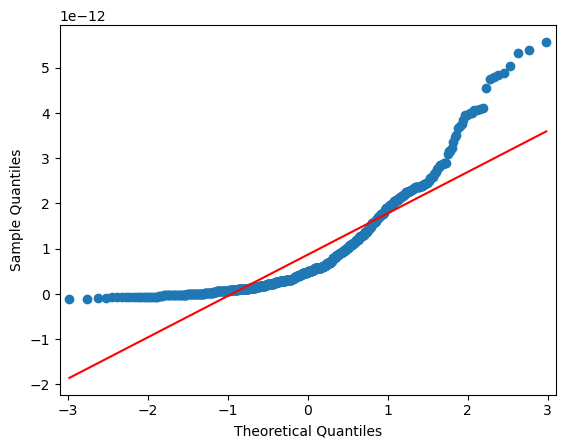

In [94]:
sm.qqplot(residuals, line="r")
plt.show()

In [95]:
# residuals are not normaly distributed

In [96]:
import scipy
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.8035708665847778, pvalue=3.1422656859808206e-28)

In [97]:
# H0:"residuals are normaly distributed"
# H1:"residuals are NOT normaly distributed"
# The p-value (0.0) indicating strong evidence against the null hypothesis.So, the residuals are not normaly distributed

# Homoscedasticity
For the homoscedasticity assumption to be satisfied, the variance of the residuals should not change as the indep. variable changes. We can view this visually by plotting the residuals vs the indep. variable (5-14 years).

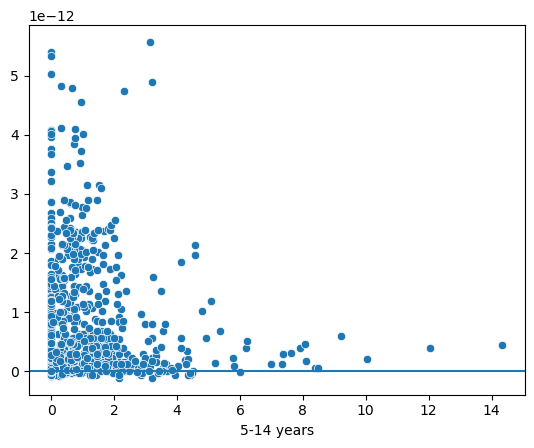

In [98]:
ax = sns.scatterplot(x=df_grouped_pivot2['5-14 years'], y=residuals)
ax.axhline(0) #horizontal line at 0
plt.show()

We can also use the Breusch-Pagan test (among others) to formally test homoscedasticity.

H0: Homoscedasticity is present (the residuals are distributed with equal variance)
Ha: Homoscedasticity is not present(the residuals are not distributed with equal variance)

In [99]:
stat, p, f_stat, f_p = sm.stats.diagnostic.het_breuschpagan(residuals,results.model.exog)
print(p,f_p) #actually performs two tests, so it returns two p-values

2.412914886835897e-131 0.0


In [100]:
# Homoscedasticity assumption is NOT satisfied. 

<b> Attempt No2 : New attempt to create a multivariable regresion model with only 2 variables</b>

In [101]:
y1 = df_grouped_pivot3['suicides/100k pop']
X1 = df_grouped_pivot3[["gdp_per_capita","HDI for year"]]
X1 = sm.add_constant(X1) #adds a column of 1's so the model will contain an intercept
X1.head()

,const,gdp_per_capita,HDI for year
6,1.0,835,0.619
11,1.0,1299,0.656
16,1.0,2931,0.695
21,1.0,4359,0.722
45,1.0,13657,0.781


In [164]:
model1 = sm.OLS(y1, X1) #instantiate
results1 = model1.fit() #fit the model (this is where OLS is actually being run)
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:      suicides/100k pop   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     19.97
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           3.71e-09
Time:                        22:55:18   Log-Likelihood:                -4225.0
No. Observations:                 697   AIC:                             8456.
Df Residuals:                     694   BIC:                             8470.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -152.8634     47.351     -3.

In [103]:
residuals1 = results1.resid
residuals1

6       -64.801439
11      -89.523703
16     -134.348078
21     -102.061675
45     -155.817167
           ...    
2300    -56.257010
2301    -54.543177
2302    -46.818561
2303    -46.911940
2304    -41.692998
Length: 697, dtype: float64

<b>Checking linear regression assumptions</b>

<b>Normality</b>

Shapiro-Wilk test  
H0:"residuals are normaly distributed"  
H1:"residuals are NOT normaly distributed"  
The p-value<0.05 will indicate strong evidence against the null hypothesis.

In [104]:
import scipy
scipy.stats.shapiro(residuals1)

ShapiroResult(statistic=0.9145203232765198, pvalue=2.21755541696891e-19)

<i> Residuals in our model are not normally destributed.</i>

<b> Homoscedasticity</b>

Breusch-Pagan test  
H0: Homoscedasticity is present (the residuals are distributed with equal variance)  
Ha: Homoscedasticity is not present(the residuals are not distributed with equal variance)  
The p-value<0.05 will indicate strong evidence against the null hypothesis.  

In [105]:
stat, p, f_stat, f_p = sm.stats.diagnostic.het_breuschpagan(residuals1,results1.model.exog)
print(p,f_p) #actually performs two tests, so it returns two p-values

6.020400152386857e-06 5.13258658509692e-06


<i>Homoscedasticity assumption is NOT satisfied. </i>

<b> Attempt No3 : New attempt to create a regression model with only 1 variable</b>

In [106]:
y2 = df_grouped_pivot3['suicides/100k pop']
X2 = df_grouped_pivot3[["gdp_per_capita"]]
X2 = sm.add_constant(X2) #adds a column of 1's so the model will contain an intercept
model2 = sm.OLS(y2, X2) #instantiate
results2 = model2.fit() #fit the model (this is where OLS is actually being run)
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:      suicides/100k pop   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.01448
Date:                Wed, 06 Sep 2023   Prob (F-statistic):              0.904
Time:                        21:38:05   Log-Likelihood:                -4244.4
No. Observations:                 697   AIC:                             8493.
Df Residuals:                     695   BIC:                             8502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            144.3581      5.540     26.

In [107]:
# Trying to understand notes above about large condition number.
# Calculate the correlation matrix

correlation_matrix = df_grouped_pivot3.corr()
correlation_matrix


C:\Users\gareg\AppData\Local\Temp\ipykernel_14080\1481448505.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_grouped_pivot3.corr()


,year,gdp_per_capita,suicides/100k pop,75+ years,55-74 years,35-54 years,25-34 years,15-24 years,5-14 years,male,female,HDI for year
year,1.000000,0.297888,-0.151043,-0.179178,-0.140352,-0.086030,-0.114450,-0.107353,0.031640,-0.126607,-0.222266,0.366786
gdp_per_capita,0.297888,1.000000,-0.004564,0.002315,0.008295,0.028331,-0.038087,-0.033946,-0.184790,-0.031397,0.091961,0.771228
suicides/100k pop,-0.151043,-0.004564,1.000000,0.879776,0.958529,0.942500,0.864827,0.736430,0.367808,0.993644,0.915259,0.144934
75+ years,-0.179178,0.002315,0.879776,1.000000,0.845058,0.723267,0.562386,0.423520,0.197705,0.860496,0.854213,0.159721
55-74 years,-0.140352,0.008295,0.958529,0.845058,1.000000,0.917735,0.778908,0.606404,0.263282,0.957012,0.860927,0.177656
35-54 years,-0.086030,0.028331,0.942500,0.723267,0.917735,1.000000,0.869706,0.724504,0.347983,0.947709,0.822552,0.172726
25-34 years,-0.114450,-0.038087,0.864827,0.562386,0.778908,0.869706,1.000000,0.877180,0.488061,0.867367,0.762780,0.055821
15-24 years,-0.107353,-0.033946,0.736430,0.423520,0.606404,0.724504,0.877180,1.000000,0.481190,0.734909,0.662715,0.001857
5-14 years,0.031640,-0.184790,0.367808,0.197705,0.263282,0.347983,0.488061,0.481190,1.000000,0.366016,0.334685,-0.209602
male,-0.126607,-0.031397,0.993644,0.860496,0.957012,0.947709,0.867367,0.734909,0.366016,1.000000,0.864094,0.137188


In [108]:
df_grouped_pivot3.head()

,country,year,gdp_per_capita,suicides/100k pop,75+ years,55-74 years,35-54 years,25-34 years,15-24 years,5-14 years,male,female,HDI for year
6,Albania,1995,835,40.55,8.88,6.17,5.96,8.23,9.15,2.16,24.49,16.06,0.619
11,Albania,2000,1299,30.70,9.31,5.64,2.58,8.55,4.35,0.27,20.41,10.29,0.656
16,Albania,2005,2931,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.695
21,Albania,2010,4359,41.66,7.04,11.17,8.42,8.28,5.86,0.89,26.18,15.48,0.722
45,Antigua and Barbuda,2012,13657,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.781


In [109]:
df_grouped_pivot3.to_csv('reshaped_suicide_overview_1985_to_2016')

In [110]:
# let's check number of rows in df_grouped_pivot3 where 'suicide/100k pop' is zero. Many zeros can have negative impact to our model.

total_rows = len(df_grouped_pivot3)
num_zeros = (df_grouped_pivot3['suicides/100k pop'] == 0).sum()

print(f"Total number of rows: {total_rows}")
print(f"Number of rows with 'suicides/100k pop' equal to zero: {num_zeros}")

Total number of rows: 697
Number of rows with 'suicides/100k pop' equal to zero: 13


In [111]:
# let's remove this 57 rows.

df_grouped_pivot4 = df_grouped_pivot3[df_grouped_pivot3['suicides/100k pop'] != 0]

<b>Attempt No4 : New attempt to create a regression model with only 1 variable and dropped 0 values for 'suicides/100k pop'</b>

In [181]:
y3 = df_grouped_pivot4['suicides/100k pop']
X3 = df_grouped_pivot4[["gdp_per_capita"]]
X3 = sm.add_constant(X3) #adds a column of 1's so the model will contain an intercept
model3 = sm.OLS(y3, X3) #instantiate
results3 = model3.fit() #fit the model (this is where OLS is actually being run)
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:      suicides/100k pop   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1673
Date:                Thu, 07 Sep 2023   Prob (F-statistic):              0.683
Time:                        07:40:27   Log-Likelihood:                -4159.6
No. Observations:                 684   AIC:                             8323.
Df Residuals:                     682   BIC:                             8332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            147.2734      4.342     33.

In [114]:
df_grouped_pivot4.head()

,country,year,gdp_per_capita,suicides/100k pop,75+ years,55-74 years,35-54 years,25-34 years,15-24 years,5-14 years,male,female,HDI for year
6,Albania,1995,835,40.55,8.88,6.17,5.96,8.23,9.15,2.16,24.49,16.06,0.619
11,Albania,2000,1299,30.70,9.31,5.64,2.58,8.55,4.35,0.27,20.41,10.29,0.656
21,Albania,2010,4359,41.66,7.04,11.17,8.42,8.28,5.86,0.89,26.18,15.48,0.722
49,Argentina,1985,3264,134.47,63.29,33.40,16.60,10.89,9.39,0.90,107.22,27.25,0.694
54,Argentina,1990,4859,134.90,64.46,31.26,16.63,11.30,10.14,1.11,105.88,29.02,0.705


In [68]:
# from sklearn.preprocessing import RobustScaler

In [69]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

<b>Attempt No5 : Regression model with only 2 variables and normilized "gdp_per_capita"</b>

In [165]:
from sklearn.preprocessing import RobustScaler
# Initialize the RobustScaler
scaler = RobustScaler()

# Create a DataFrame copy with a single column for 'gdp_per_capita'
column_to_normalize = 'gdp_per_capita'
df_grouped_pivot_normilized_gdp = df_grouped_pivot4.copy()
df_grouped_pivot_normilized_gdp[column_to_normalize] = scaler.fit_transform(df_grouped_pivot_normilized_gdp[[column_to_normalize]])

In [166]:
df_grouped_pivot_normilized_gdp.head()

,country,year,gdp_per_capita,suicides/100k pop,75+ years,55-74 years,35-54 years,25-34 years,15-24 years,5-14 years,male,female,HDI for year
6,Albania,1995,-0.452077,40.55,8.88,6.17,5.96,8.23,9.15,2.16,24.49,16.06,0.619
11,Albania,2000,-0.434166,30.70,9.31,5.64,2.58,8.55,4.35,0.27,20.41,10.29,0.656
21,Albania,2010,-0.316046,41.66,7.04,11.17,8.42,8.28,5.86,0.89,26.18,15.48,0.722
49,Argentina,1985,-0.358315,134.47,63.29,33.40,16.60,10.89,9.39,0.90,107.22,27.25,0.694
54,Argentina,1990,-0.296746,134.90,64.46,31.26,16.63,11.30,10.14,1.11,105.88,29.02,0.705


In [167]:
y4 = df_grouped_pivot_normilized_gdp['suicides/100k pop']
X4 = df_grouped_pivot_normilized_gdp[["gdp_per_capita","HDI for year"]]
X4 = sm.add_constant(X4) #adds a column of 1's so the model will contain an intercept
X4.head()

,const,gdp_per_capita,HDI for year
6,1.0,-0.452077,0.619
11,1.0,-0.434166,0.656
21,1.0,-0.316046,0.722
49,1.0,-0.358315,0.694
54,1.0,-0.296746,0.705


In [168]:
model_norm = sm.OLS(y4, X4) #instantiate
results_norm = model_norm.fit() #fit the model (this is where OLS is actually being run)
print(results_norm.summary())

                            OLS Regression Results                            
Dep. Variable:      suicides/100k pop   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     20.79
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           1.72e-09
Time:                        22:57:02   Log-Likelihood:                -4139.4
No. Observations:                 684   AIC:                             8285.
Df Residuals:                     681   BIC:                             8298.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -170.5844     49.577     -3.

<b> Checking Normality </b>

In [161]:
import numpy as np
# Apply a logarithmic transformation to the skewed column
df_grouped_pivot_normilized_gdp['suicides/100k pop'] = np.log1p(df_grouped_pivot_normilized_gdp['suicides/100k pop'])

#from scipy import stats / data is still skewed
# Apply a Box-Cox transformation to the skewed column
# df_grouped_pivot_normilized_gdp['suicides/100k pop'], _ = stats.boxcox(df_grouped_pivot_normilized_gdp['suicides/100k pop'])

In [162]:
residuals_norm = results_norm.resid
residuals_norm

6       -68.089154
11      -92.972234
21     -105.649966
49       -2.522579
54       -4.487547
           ...    
2300    -59.684949
2301    -57.986733
2302    -50.285344
2303    -50.387158
2304    -45.173256
Length: 684, dtype: float64

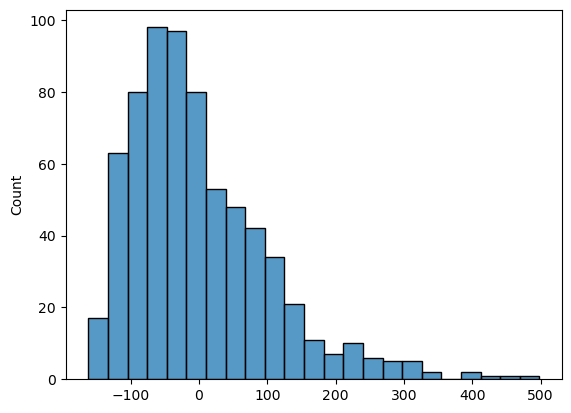

In [163]:
sns.histplot(residuals_norm)
plt.show()

looks closer to the normal distribution compared to the previous versions, but still skewed to the right

In [160]:
scipy.stats.shapiro(residuals_norm)

ShapiroResult(statistic=0.9100606441497803, pvalue=1.121921866911864e-19)

<b> Residuals are not normaly distributed :( </b>

#### LAST TRY (LOGARITMIC MODEL)

In [193]:
import statsmodels.api as sm

# Fit a logarithmic model
model_ln = sm.OLS(y2, np.log(X2))
results_ln = model_ln.fit()

# # Print the summary of the regression results
print(results_ln.summary())

                                 OLS Regression Results                                
Dep. Variable:      suicides/100k pop   R-squared (uncentered):                   0.634
Model:                            OLS   Adj. R-squared (uncentered):              0.634
Method:                 Least Squares   F-statistic:                              1208.
Date:                Thu, 07 Sep 2023   Prob (F-statistic):                   2.96e-154
Time:                        07:44:04   Log-Likelihood:                         -4254.6
No. Observations:                 697   AIC:                                      8511.
Df Residuals:                     696   BIC:                                      8516.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

C:\Users\gareg\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
